## Reading the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Uploading the csv file

In [2]:
df = pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')

## Data exploration

In [3]:
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [4]:
df.shape

(301, 8)

In [5]:
df.tail()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5
300,301,Carson Wentz,USA,10,>100,American Football,2020,59.1


In [6]:
df.drop('S.NO', axis = 1 , inplace=True)

In [7]:
df.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


In [9]:
df['Nationality'].unique()

array(['USA', 'Brazil', 'France', 'Australia', 'Canada', 'UK', 'Austria',
       'Germany', 'Russia', 'Italy', 'Finland', 'Switzerland',
       'Philippines', 'Portugal', 'Dominican', 'Argentina', 'Filipino',
       'Spain', 'Serbia', 'Northern Ireland', 'Ireland', 'Mexico'],
      dtype=object)

In [10]:
df['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

**We do not have data for year 2001. Hence we will ignore it during our exploratory analysis.**

## Cleaning the Sports Column

In [11]:
df['Sport'].unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

In [12]:
df['Sport'] = df['Sport'].replace('boxing','Boxing')
df['Sport'] = df['Sport'].replace('auto racing','Auto Racing')
df['Sport'] = df['Sport'].replace('golf','Golf')
df['Sport'] = df['Sport'].replace('basketball','Basketball')
df['Sport'] = df['Sport'].replace('Auto racing','Auto Racing')
df['Sport'] = df['Sport'].replace('American Football / Baseball','American Football')
df['Sport'] = df['Sport'].replace('tennis','Tennis')
df['Sport'] = df['Sport'].replace('ice hockey','Ice Hockey')
df['Sport'] = df['Sport'].replace('soccer','Soccer')
df['Sport'] = df['Sport'].replace('baseball','Baseball')
df['Sport'] = df['Sport'].replace('cycling','Cycling')
df['Sport'] = df['Sport'].replace('motorcycle gp','Motorcycle gp')

In [13]:
df['Sport'].unique()

array(['Boxing', 'Auto Racing', 'Golf', 'Basketball', 'Tennis', 'NFL',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football',
       'F1 Motorsports', 'NASCAR', 'Hockey', 'Auto Racing (Nascar)',
       'F1 racing', 'Soccer', 'Cycling', 'Motorcycle gp', 'MMA'],
      dtype=object)

## Data Exploration

In [14]:
idx = df.groupby(['Year'])['earnings ($ million)'].transform(max) == df['earnings ($ million)']
df[idx]

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,NaN,Boxing,1990,28.6
10,Evander Holyfield,USA,1,8,Boxing,1991,60.5
20,Michael Jordan,USA,1,3,Basketball,1992,35.9
30,Michael Jordan,USA,1,1,Basketball,1993,36.0
40,Michael Jordan,USA,1,1,Basketball,1994,30.0
50,Michael Jordan,USA,1,1,Basketball,1995,43.9
60,Mike Tyson,USA,1,2,Boxing,1996,75.0
70,Michael Jordan,USA,1,2,Basketball,1997,78.3
80,Michael Jordan,USA,1,NaN,Basketball,1998,69.0
90,Michael Schumacher,Germany,1,2,Auto Racing,1999,49.0


In [15]:
#alternative to the above query
X = df.sort_values(['Year','earnings ($ million)'], ascending=[True, False])
X = df.groupby('Year')
X = X.first()
X = X.reset_index()

In [16]:
X

,Year,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
0,1990,Mike Tyson,USA,1,None,Boxing,28.6
1,1991,Evander Holyfield,USA,1,8,Boxing,60.5
2,1992,Michael Jordan,USA,1,3,Basketball,35.9
3,1993,Michael Jordan,USA,1,1,Basketball,36.0
4,1994,Michael Jordan,USA,1,1,Basketball,30.0
5,1995,Michael Jordan,USA,1,1,Basketball,43.9
6,1996,Mike Tyson,USA,1,2,Boxing,75.0
7,1997,Michael Jordan,USA,1,2,Basketball,78.3
8,1998,Michael Jordan,USA,1,None,Basketball,69.0
9,1999,Michael Schumacher,Germany,1,2,Auto Racing,49.0


<AxesSubplot:xlabel='Year', ylabel='earnings ($ million)'>

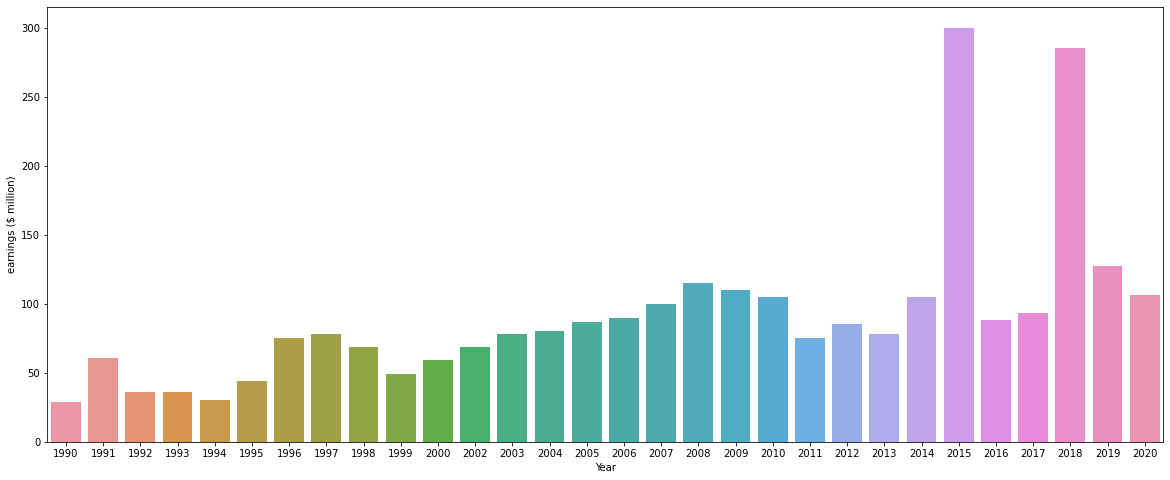

In [17]:
plt.figure(figsize=(20,8))
sns.barplot(data=X, x='Year', y='earnings ($ million)')

<AxesSubplot:xlabel='Nationality', ylabel='count'>

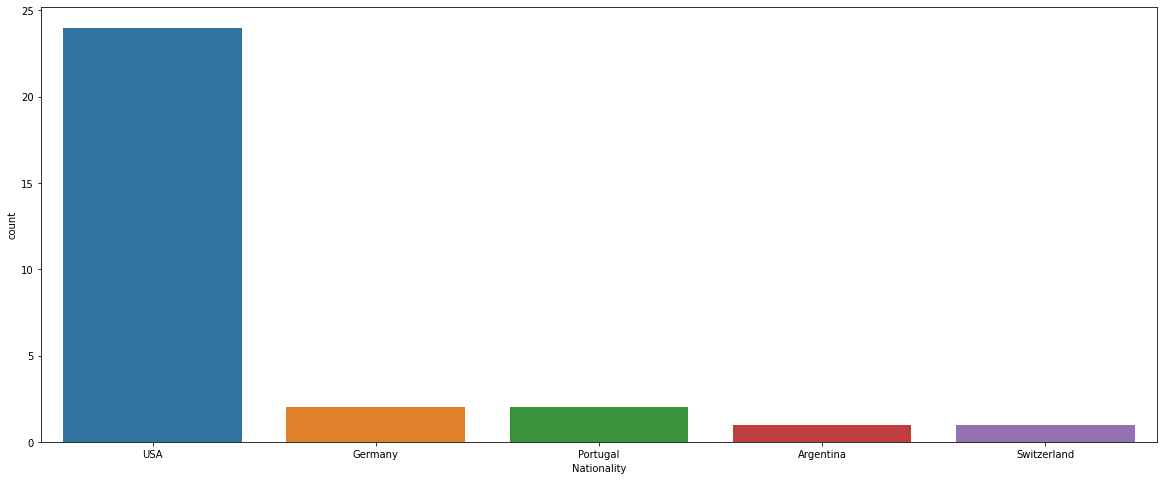

In [18]:
plt.figure(figsize=(20,8))
sns.countplot(data=X, x='Nationality')

**During first decade 1990 -2000 , Michael Jordan frequently earned the most. From 2001 - 2010 , Tiger Wood appeared more frequently. In the last decade 2011-2020 , Tiger wood was replaced by Floyd Mayweather.**


**All the three players mentioned above were from USA. Hence, USA topped the chart when it came to most earned players.**

### Atheletes that earned the most maximum number of times

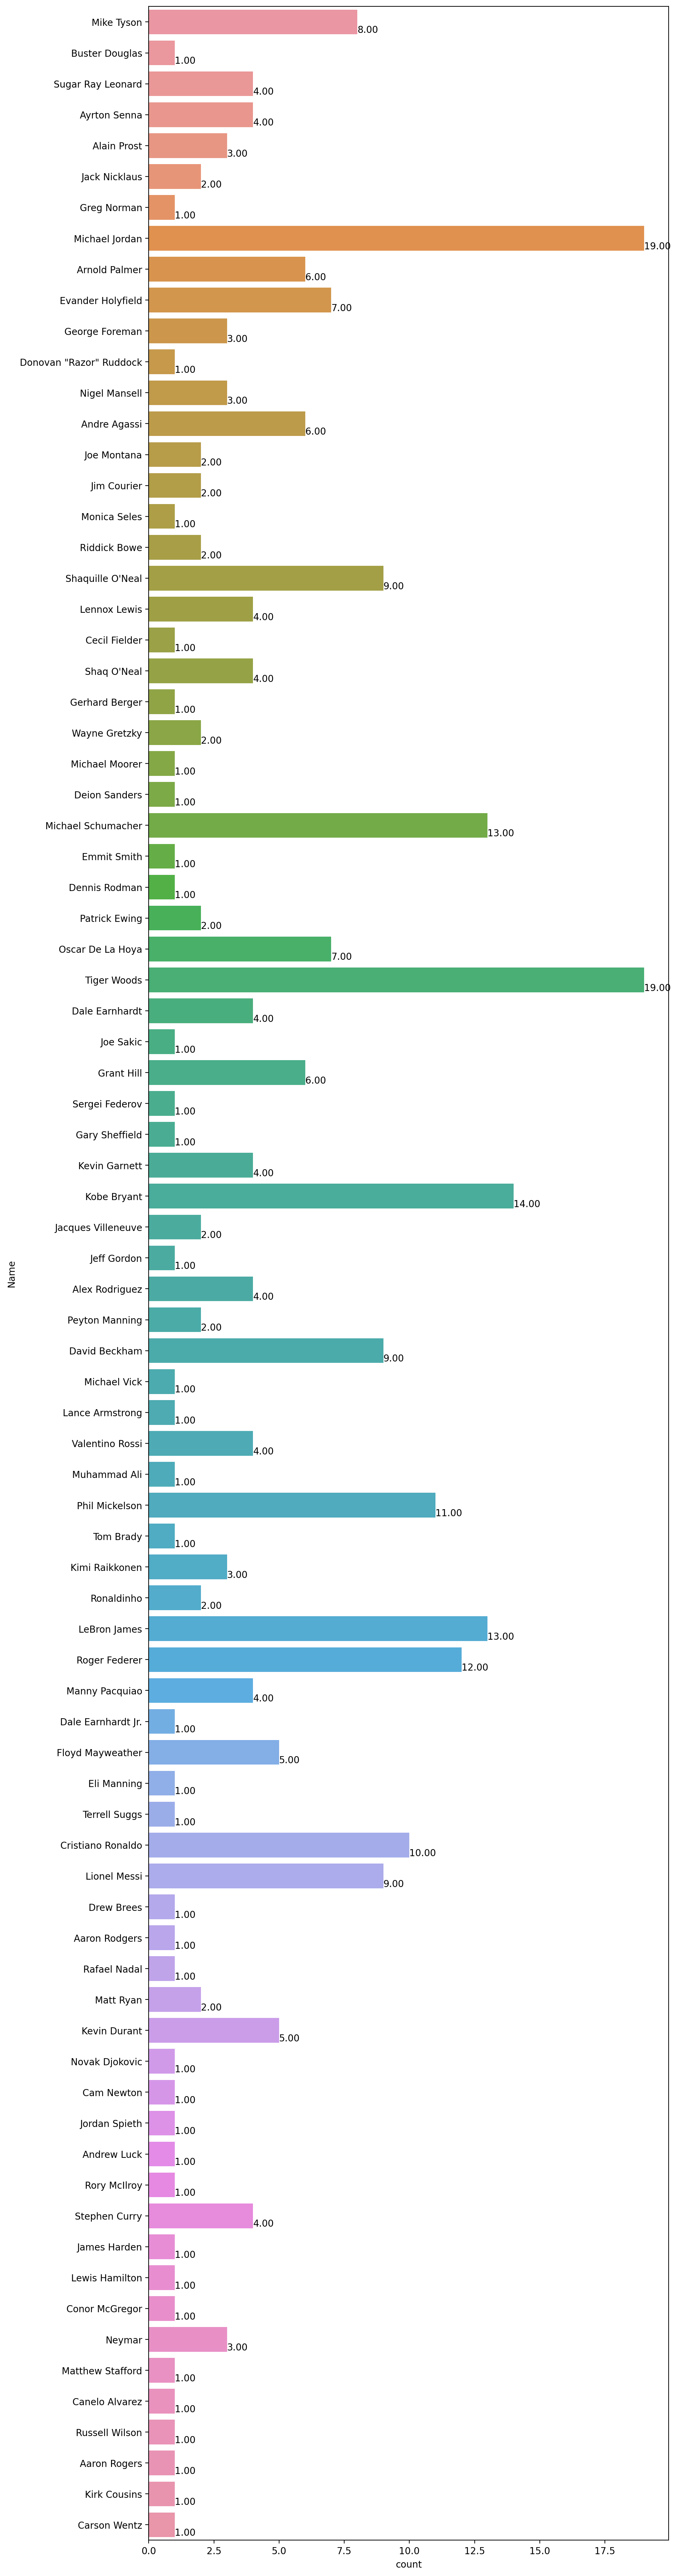

In [19]:
plt.figure(figsize=(10,50), dpi=200)
ax = sns.countplot(data = df, y ='Name')
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_width()), (p.get_width(),p.get_y()+0.75))

**Tiger Woods and Michael Jordan appeared in forbes list maximum number of times. Each has a count of 19.**

## Lets explore Tiger Woods 

In [20]:
df[df['Name'] == 'Tiger Woods']


,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
75,Tiger Woods,USA,6,26,Golf,1997,26.1
83,Tiger Woods,USA,4,NaN,Golf,1998,26.8
91,Tiger Woods,USA,2,4,Golf,1999,47.0
101,Tiger Woods,USA,2,2,Golf,2000,53.0
110,Tiger Woods,USA,1,2,Golf,2002,69.0
121,Tiger Woods,USA,1,1,Golf,2003,78.0
131,Tiger Woods,USA,1,1,Golf,2004,80.3
141,Tiger Woods,USA,1,1,Golf,2005,87.0
151,Tiger Woods,USA,1,1,Golf,2006,90.0
161,Tiger Woods,USA,1,1,Golf,2007,100.0


**Tiger Woods was consistent on the list from 1997 to 2015.**

In [21]:
df[df['Sport'] == 'Golf']['Name'].unique()

array(['Jack Nicklaus', 'Greg Norman', 'Arnold Palmer',
       'Sugar Ray Leonard', 'Tiger Woods', 'Phil Mickelson',
       'Jordan Spieth', 'Rory McIlroy'], dtype=object)

In [22]:
df[(df['Sport'] == 'Golf') & (df['Year'].between(1990,1996,inclusive=True))]['Name'].value_counts() 

Arnold Palmer        5
Sugar Ray Leonard    3
Jack Nicklaus        2
Greg Norman          1
Name: Name, dtype: int64

**Before 1997 Arnold Palmer appeared frequently on the list**

In [23]:
df[(df['Sport'] == 'Golf') & (df['Year'].between(2016,2019,inclusive=True))]['Name'].value_counts() 

Rory McIlroy      1
Jordan Spieth     1
Phil Mickelson    1
Name: Name, dtype: int64

(1997.0, 2020.0)

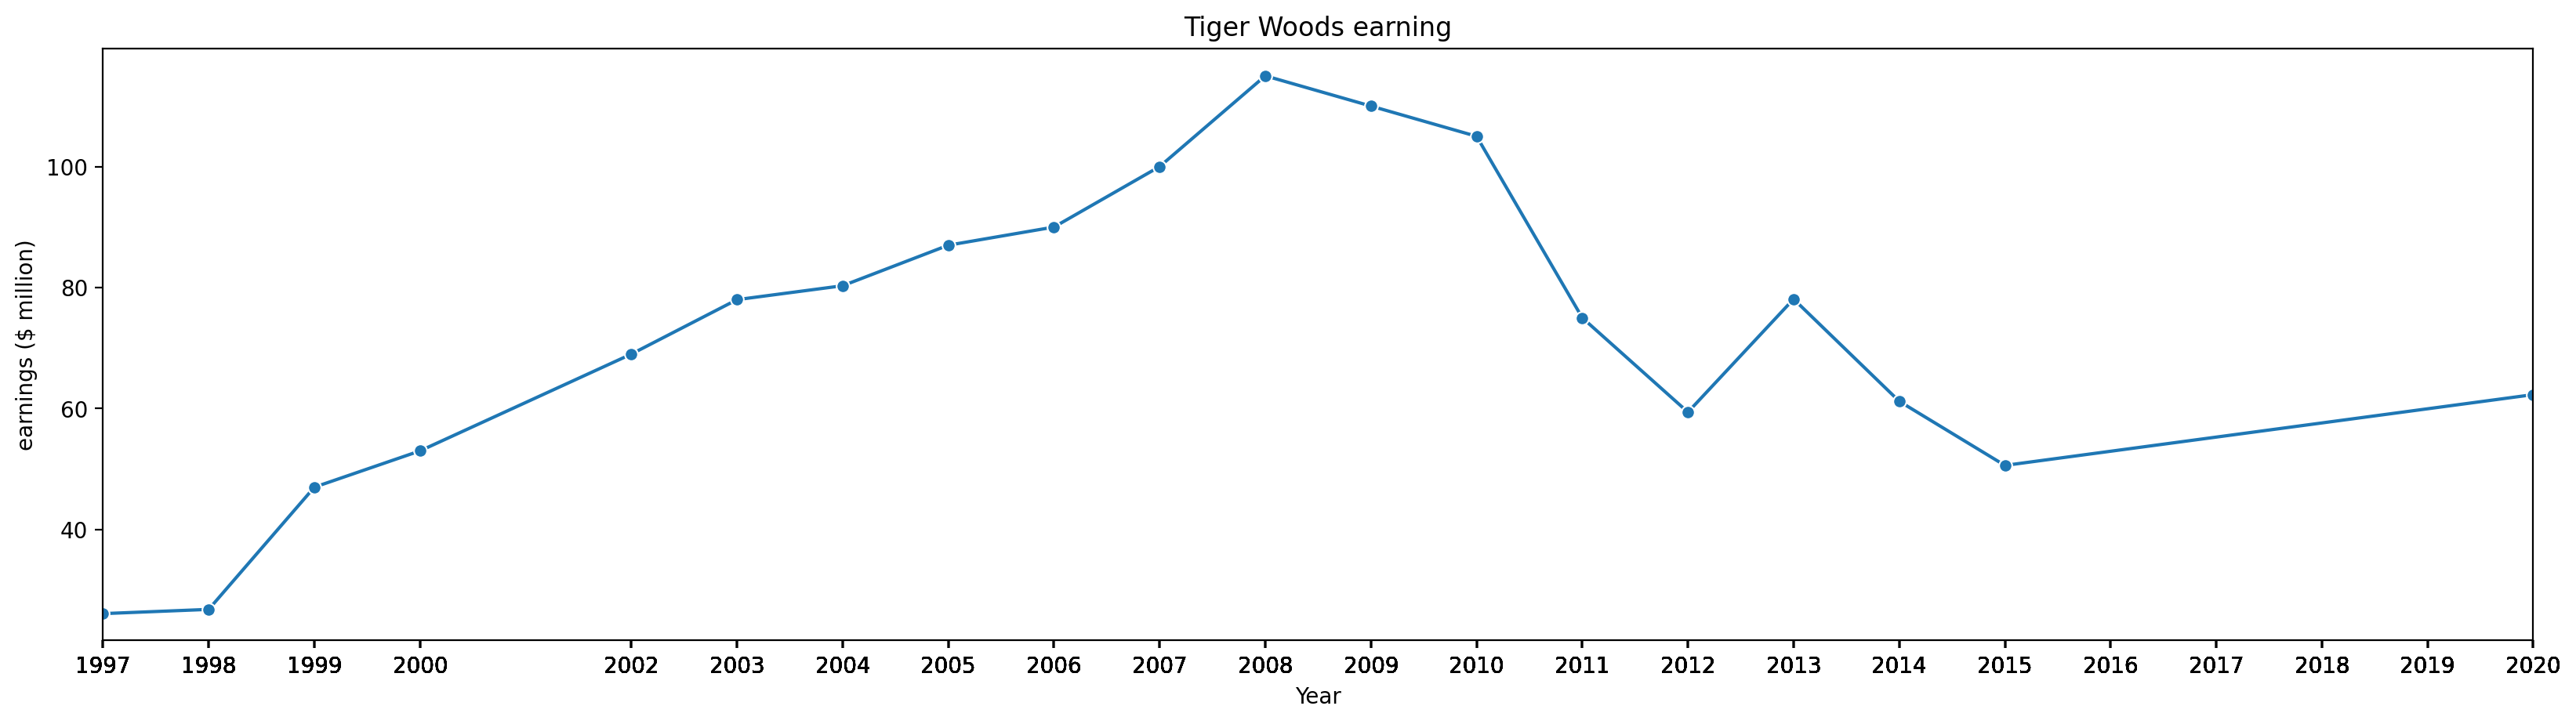

In [24]:
plt.figure(figsize=(20,5), dpi=200)
plt.title('Tiger Woods earning')
ax = sns.lineplot(data = df[df['Name'] == 'Tiger Woods'], x='Year' , y ='earnings ($ million)',marker='o')
ax.set(xticks=df.Year.values)
plt.xlim(1997,2020)

**Earnings of Tiger Woods increased consistently till 2008. In 2008 he made a total of $115 Million. After which there is a sharp fall observed in the amount he earned.**

In [25]:
df[df['Name'] == 'Tiger Woods'].shape

(19, 7)

In [26]:
df[(df['Name'] == 'Tiger Woods') & (df['Current Rank'] ==1)].shape

(11, 7)

In [27]:
percent = (11/19)*100
percent

57.89473684210527

**Tiger Woods appeared in the list 19 times. Out of which 11 times he was ranked no 1. Which means almost more than half times he dominated the list scoring rank 1.**

## Lets explore Michael Jordan

In [28]:
df[df['Name'] == 'Michael Jordan']


,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
7,Michael Jordan,USA,8,NaN,Basketball,1990,8.1
12,Michael Jordan,USA,3,8,Basketball,1991,16.0
20,Michael Jordan,USA,1,3,Basketball,1992,35.9
30,Michael Jordan,USA,1,1,Basketball,1993,36.0
40,Michael Jordan,USA,1,1,Basketball,1994,30.0
50,Michael Jordan,USA,1,1,Basketball,1995,43.9
61,Michael Jordan,USA,2,1,Basketball,1996,52.6
70,Michael Jordan,USA,1,2,Basketball,1997,78.3
80,Michael Jordan,USA,1,NaN,Basketball,1998,69.0
93,Michael Jordan,USA,4,1,Basketball,1999,40.0


**Michael Jordan appeared consistently on the list from 1990 to 2009**

In [29]:
df[(df['Sport'] == 'Basketball') & (df['Year'].between(2010,2020,inclusive=True))]['Name'].value_counts() 

LeBron James     11
Kobe Bryant       7
Kevin Durant      5
Stephen Curry     4
James Harden      1
Name: Name, dtype: int64

**After 2009 LeBron James was more popular name on the list for basketball.**

(1990.0, 2009.0)

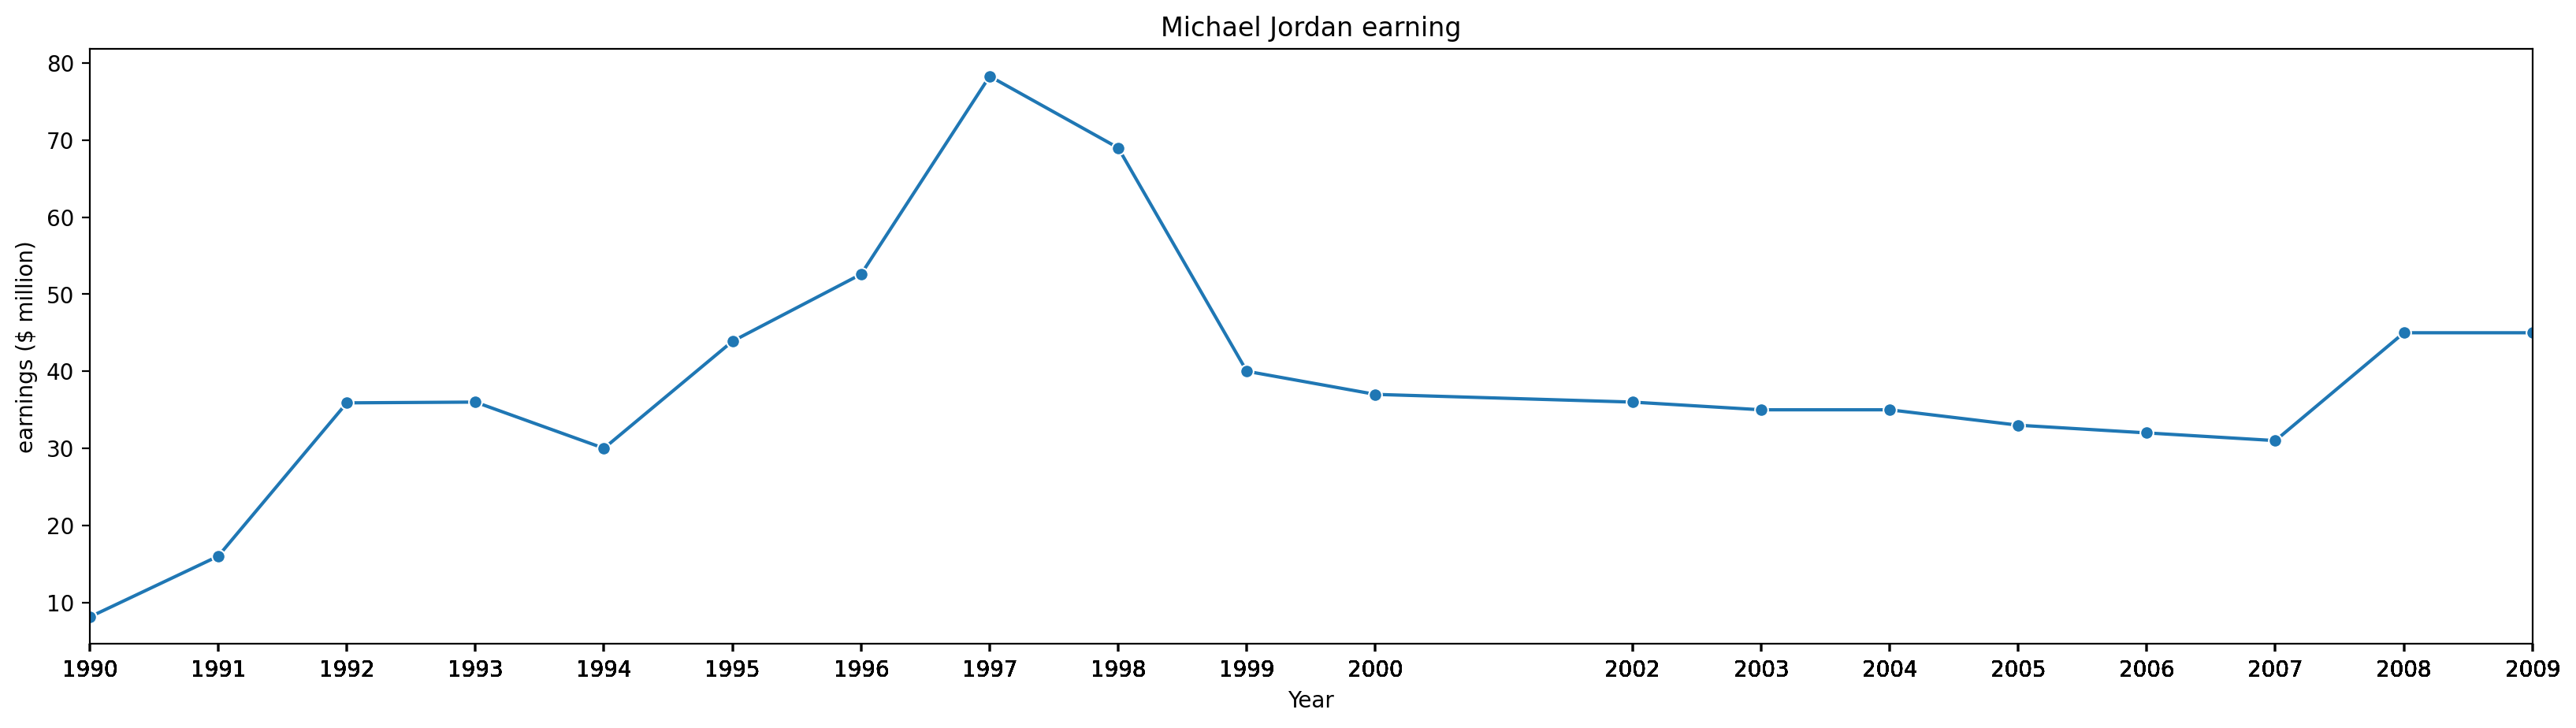

In [30]:
plt.figure(figsize=(20,5), dpi=200)
plt.title('Michael Jordan earning')
ax = sns.lineplot(data = df[df['Name'] == 'Michael Jordan'], x='Year' , y ='earnings ($ million)',marker='o')
ax.set(xticks=df.Year.values)
plt.xlim(1990,2009)

**The earning shows a fluctuant rise and after decline remains constant.**

In [31]:
df[df['Name'] == 'Michael Jordan'].shape

(19, 7)

In [32]:
df[(df['Name'] == 'Michael Jordan') & (df['Current Rank'] ==1)].shape

(6, 7)

In [33]:
percent = (6/19)*100
percent

31.57894736842105

**Micheal Jordan seldom topped the list.**

## Comparing earnings - Michael Jordan and Tiger Woods

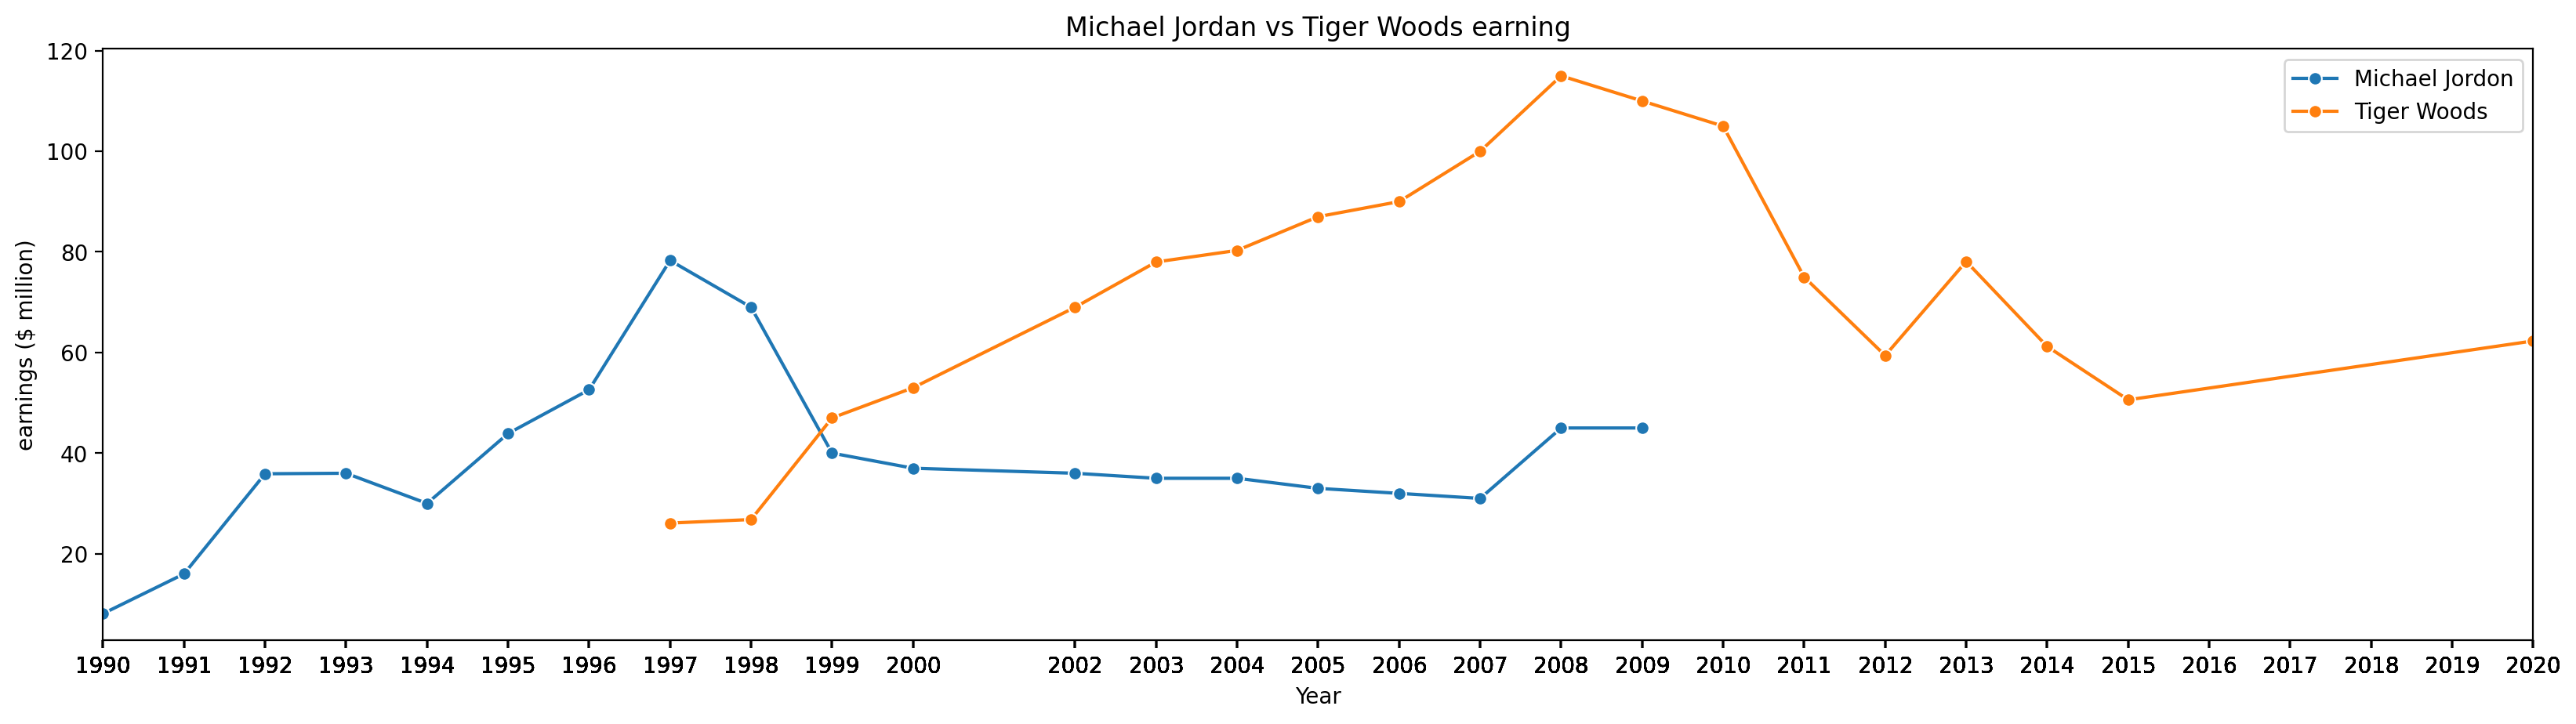

In [34]:
plt.figure(figsize=(20,5), dpi=200)
plt.title('Michael Jordan vs Tiger Woods earning')
ax = sns.lineplot(data = df[df['Name'] == 'Michael Jordan'], x='Year' , y ='earnings ($ million)',marker='o', label = 'Michael Jordon')
ax = sns.lineplot(data = df[df['Name'] == 'Tiger Woods'], x='Year' , y ='earnings ($ million)',marker='o', label = 'Tiger Woods')
ax.set(xticks=df.Year.values)
plt.xlim(1990,2020)
plt.legend()

**A considerable difference can be observed between highest paid salaries to Micheal Jordan and Tiger Woods.**

**When Micheal Jordan earn the highest amount in 1997, Tiger Woods earning were lowest.**

## Country which produces the maximum earners in Sports

In [35]:
df['Nationality'].value_counts()

USA                 206
Germany              13
UK                   13
Switzerland          12
Portugal             10
Brazil                9
Argentina             9
Canada                6
Italy                 4
France                3
Finland               3
Philippines           3
Russia                1
Dominican             1
Mexico                1
Spain                 1
Northern Ireland      1
Serbia                1
Australia             1
Filipino              1
Ireland               1
Austria               1
Name: Nationality, dtype: int64

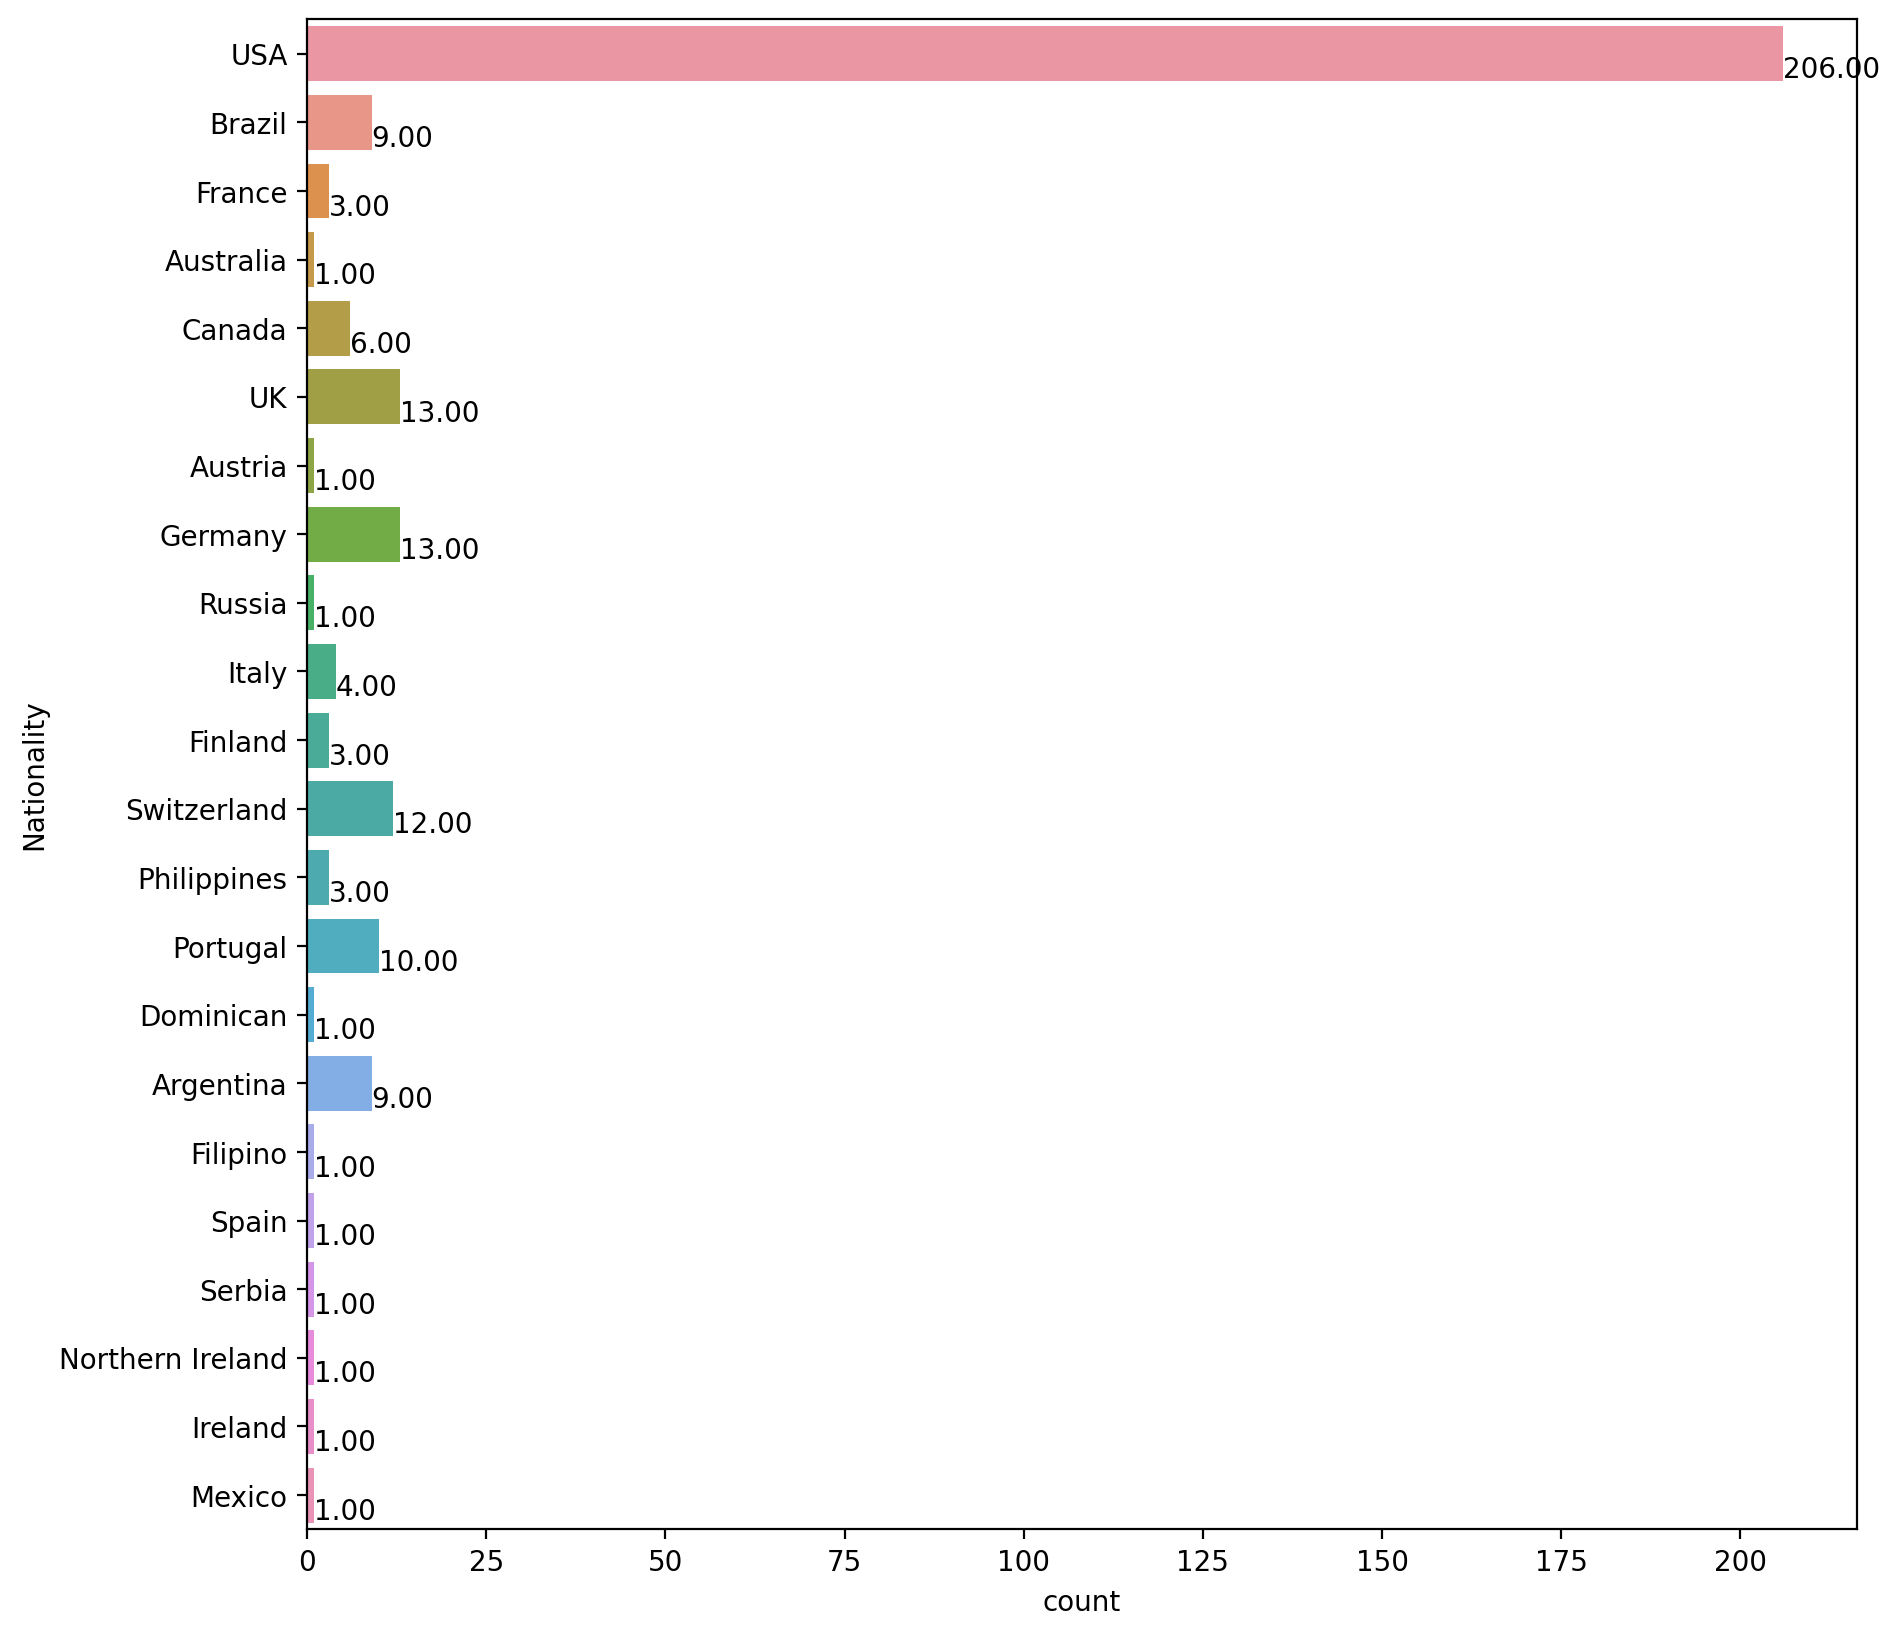

In [36]:
plt.figure(figsize=(10,10), dpi=200)
ax = sns.countplot(data = df, y ='Nationality')
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_width()), (p.get_width(),p.get_y()+0.75))

**Clearly USA dominates**

## Sports From USA

In [39]:
df[df['Nationality'] == 'USA']['Sport'].unique()

array(['Boxing', 'Golf', 'Basketball', 'Tennis', 'NFL', 'NBA', 'Baseball',
       'American Football', 'NASCAR', 'Auto Racing',
       'Auto Racing (Nascar)', 'Cycling'], dtype=object)

In [41]:
df[df['Nationality'] == 'USA']['Sport'].value_counts()

Basketball              81
Golf                    42
Boxing                  40
American Football       18
Tennis                   9
Baseball                 5
NFL                      3
NASCAR                   3
Auto Racing (Nascar)     2
Auto Racing              1
Cycling                  1
NBA                      1
Name: Sport, dtype: int64

**In USA, the sport that dominates the earning was Basketball.** 

## Which Sport Dominates in earning?

In [45]:
df['Sport'].value_counts()

Basketball              81
Boxing                  46
Golf                    44
Soccer                  33
Tennis                  23
Auto Racing             18
American Football       18
F1 racing                8
Baseball                 6
F1 Motorsports           5
Motorcycle gp            4
Ice Hockey               3
NASCAR                   3
NFL                      3
Auto Racing (Nascar)     2
MMA                      1
Cycling                  1
Hockey                   1
NBA                      1
Name: Sport, dtype: int64

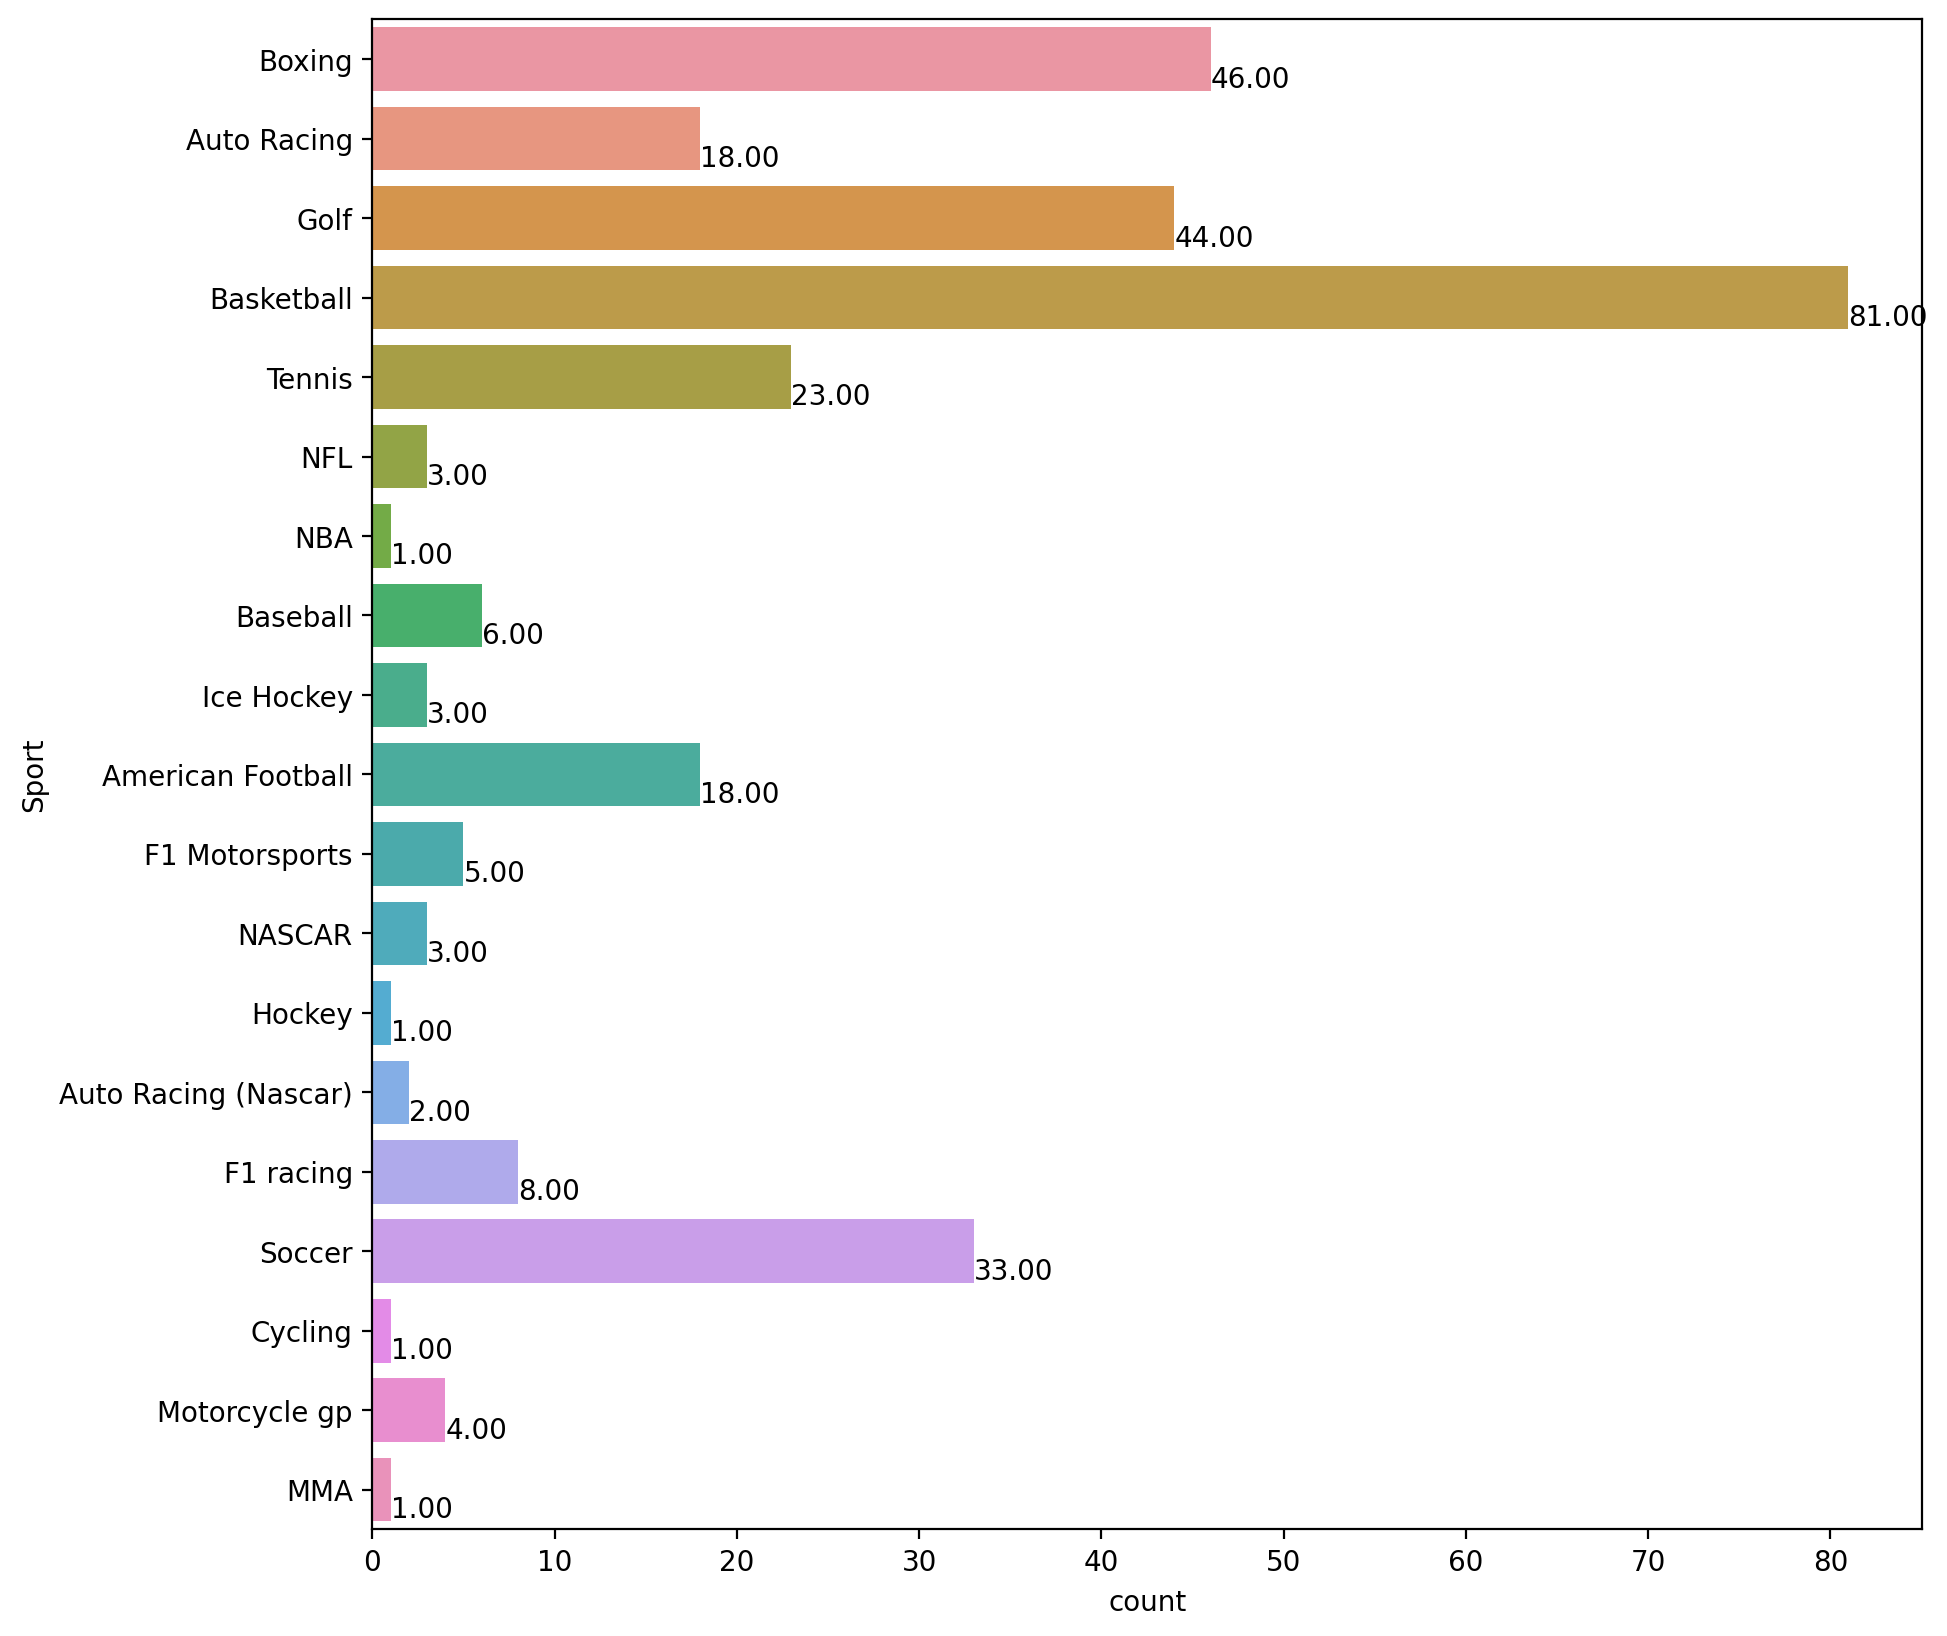

In [46]:
plt.figure(figsize=(10,10), dpi=200)
ax = sns.countplot(data = df, y ='Sport')
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_width()), (p.get_width(),p.get_y()+0.75))

**Basketball sport dominates in earning.**

In [47]:
df.shape

(301, 7)

In [48]:
df[df['Sport'] == 'Basketball'].shape

(81, 7)

In [49]:
percent = (81/301)*100
percent

26.910299003322258

**Out of all the occurences, Almost 27% times the player that made to the forbes list played Basketball.**

## Analysis of top three earning players of the entire time

In [65]:
X = df.groupby('Name')['earnings ($ million)'].sum()

In [66]:
X = X.reset_index()

In [68]:
X.nlargest(3,'earnings ($ million)')

,Name,earnings ($ million)
78,Tiger Woods,1373.8
45,LeBron James,844.8
25,Floyd Mayweather,840.0


## Earning trendings of the three players

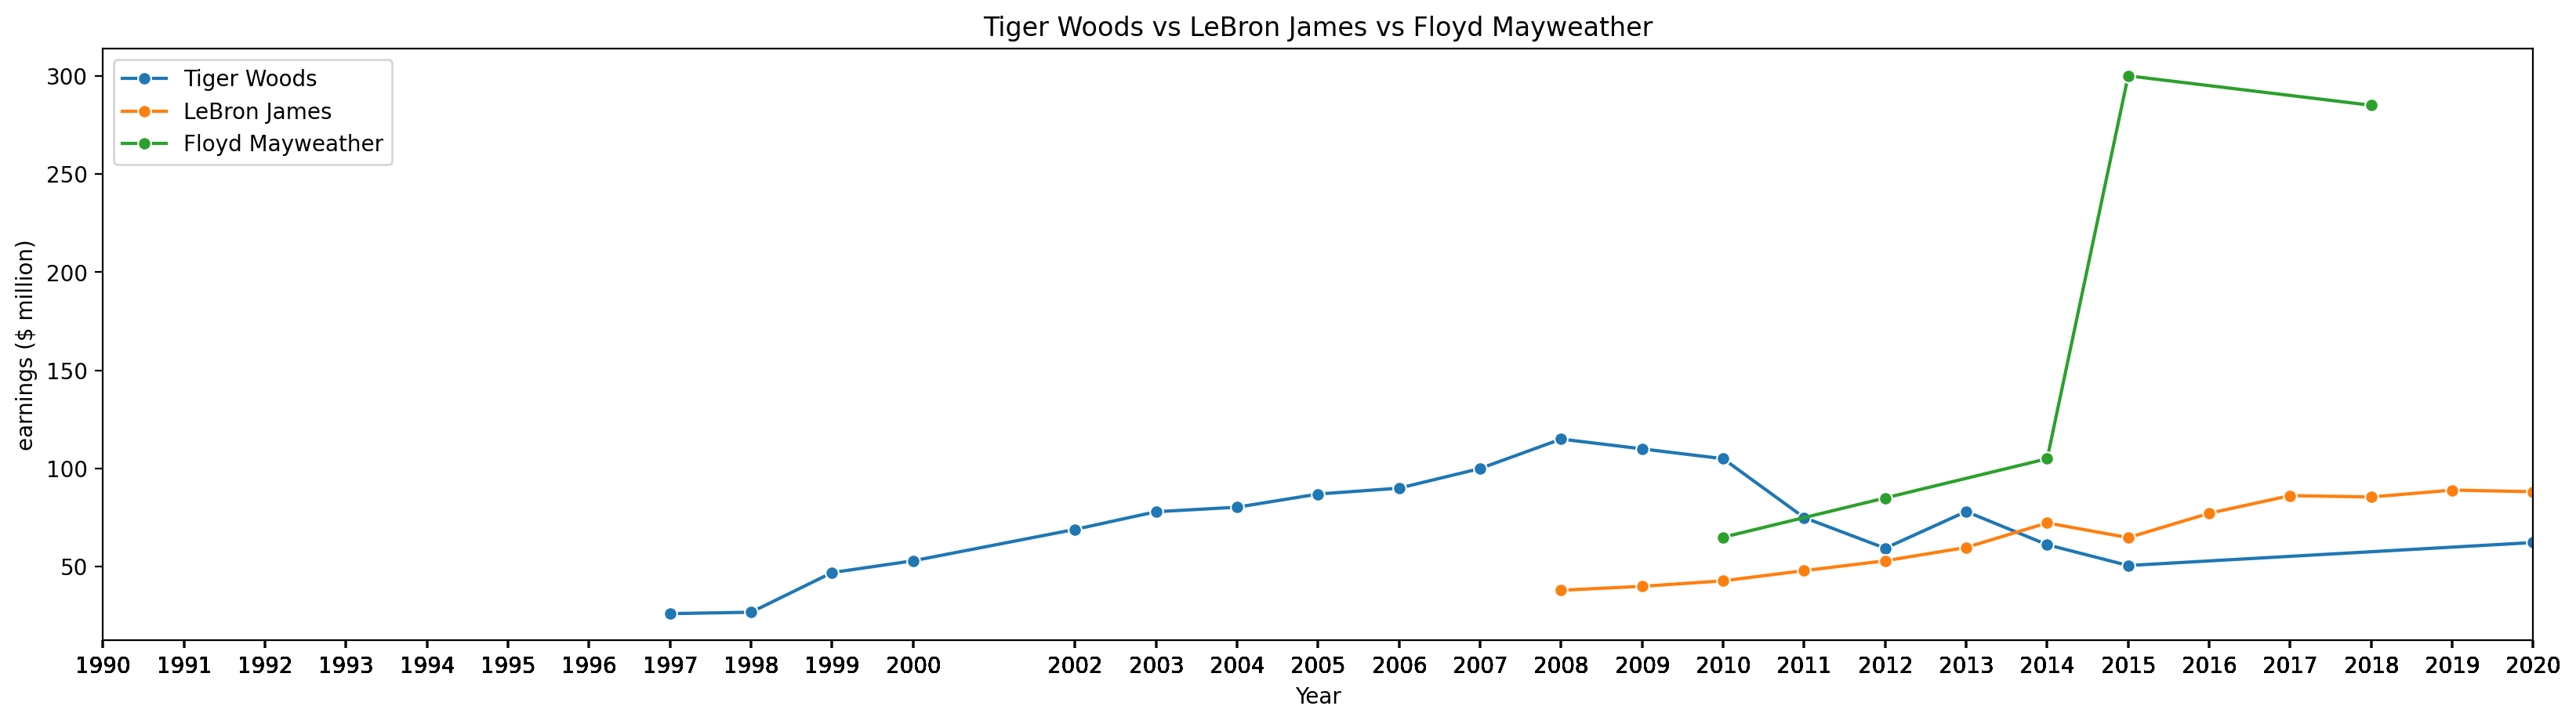

In [71]:
plt.figure(figsize=(20,5), dpi=200)
plt.title('Tiger Woods vs LeBron James vs Floyd Mayweather')
ax = sns.lineplot(data = df[df['Name'] == 'Tiger Woods'], x='Year' , y ='earnings ($ million)',marker='o', label = 'Tiger Woods')
ax = sns.lineplot(data = df[df['Name'] == 'LeBron James'], x='Year' , y ='earnings ($ million)',marker='o', label = 'LeBron James')
ax = sns.lineplot(data = df[df['Name'] == 'Floyd Mayweather'], x='Year' , y ='earnings ($ million)',marker='o', label = 'Floyd Mayweather')
ax.set(xticks=df.Year.values)
plt.xlim(1990,2020)
plt.legend()

**Tiger woods name appeared in the list most of the time. On the other hand, Floyd Mayweather made it to the list for not more than 6 times.**

**Earnings of Tiger Woods shows a steady increase and after 2008 shows a fluctuant decrease. However, Earnings of LeBron shows a steady rise.**

**The earnings of Floyd Mayweather shows an increasing trend. Lets explore**

In [73]:
df[df['Name'] == 'Floyd Mayweather']

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
192,Floyd Mayweather,USA,2,>10,Boxing,2010,65.0
211,Floyd Mayweather,USA,1,?,Boxing,2012,85.0
231,Floyd Mayweather,USA,1,14,Boxing,2014,105.0
241,Floyd Mayweather,USA,1,1,Boxing,2015,300.0
271,Floyd Mayweather,USA,1,>100,Boxing,2018,285.0


**Floyd Mayweather earned $300 M in 2015 which is almost 2 times more the amount he made in 2014.**

In [80]:
df[(df['Name'] == 'Tiger Woods') & (df['Current Rank'] == 1)].shape

(11, 7)

In [83]:
df[(df['Name'] == 'LeBron James') & (df['Current Rank'] == 1)].shape

(0, 7)

In [85]:
df[(df['Name'] == 'Floyd Mayweather') & (df['Current Rank'] == 1)].shape

(4, 7)

**Tiger woods achieved rank 1, 11 times whereas Floyd Mayweather achieved rank 1 only 4 times. LeBron James despite of making huge max sum, he never ranked 1.**

In [88]:
df[df['Name'].isin(['Tiger Woods','LeBron James','Floyd Mayweather'])]['Nationality'].unique()

array(['USA'], dtype=object)

**All the three highly paid atheletes belong from US.**